In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import copy

In [2]:
def sigmoid(x):

    for i in range(len(x)):
 
        x[i]=1/(1+np.exp(-x[i]))
  
    return x

# Example for Problem 1
x = np.array([0.2,0.5,0.3,0.8])
print(sigmoid(x))

[0.549834   0.62245933 0.57444252 0.68997448]


In [3]:
def sigmoid_prime(x):

    for i in range(len(x)):
     
        x[i]=1/(1+np.exp(-x[i]))
        x[i] = x[i] * (1 - x[i])

    return x

# Example for Problem 2
x = np.array([0.2,0.5,0.3,0.8])
print(sigmoid_prime(x))

[0.24751657 0.23500371 0.24445831 0.2139097 ]


In [4]:
def init_weights(nodes, n_features):
    weights=[]
    bias=[]
    
    weights.append(np.empty(shape=(n_features,nodes[0]), dtype='object'))
    
    for i in range(len(nodes)-1):
        
        weights.append(np.empty(shape=(nodes[i],nodes[i+1]), dtype='object'))
    
    for i in range(len(weights)):
        for y in range(len(weights[i])):
            if len(weights[i][y])==1:
                weights[i][y]=1
            else:
                weights[i][y]=np.random.dirichlet(np.ones(len(weights[i][y])),size=1)
            
    for i in range(len(nodes)):
        bias.append(np.empty(shape=(nodes[i],), dtype='object'))

    for i in range(len(bias)):
        
        x=np.random.dirichlet(np.ones(len(bias[i])),size=1)
        bias[i]=x[0]
        
    return(weights,bias)

# Example for Problem 3
# For example for the following example I have three and two neurons for the hidden layers and one neuron for the output layer.
# The input has 2 features.

weights,bias = init_weights((3,2,1),2)
print(list(map(np.shape,weights)))
print(list(map(np.shape,bias)))

[(2, 3), (3, 2), (2, 1)]
[(3,), (2,), (1,)]


In [5]:
def feed_forward(X,weights,bias):
    


    a_list=[]
    z_list=[]
    X_row,X_column=X.shape
    X_row
    y_pred = np.empty((X_row, 1))
    y_pred    
    for l in range(len(y_pred)):

        y_pred[l].fill(0)

    #point iterator
    for p in range(len(X)):
        W=np.array([X[p]])
        # layer iterator
        for x in range(len(weights)):

            output_of_node=np.zeros(shape=(1,len(weights[x][0])))
            input_of_node=np.zeros(shape=(1,len(weights[x][0])))
            input=np.zeros(shape=(1,len(weights[x][0])))

            # output neurons iterator
            for y in range(len(weights[x][0])):

                #input neurons iterator
                for z in range(len(W[0])):
                    input_of_node[0][y]=input_of_node[0][y]+W[0][z]*weights[x][z][y]

                if x==len(weights)-1:
                    input[0][y]=input_of_node[0][y]+bias[x][y]
                    output_of_node[0][y]=input_of_node[0][y]+bias[x][y]

                else:
                    input[0][y]=input_of_node[0][y]+bias[x][y]
                    output_of_node[0][y]=1/(1+np.exp(-(input_of_node[0][y]+bias[x][y])))

            z_list.append(input)
            a_list.append(output_of_node)
            W=output_of_node
        y_pred[p]=a_list[-1]

    return (y_pred,a_list,z_list)

# Example for Problem 4

X = np.array([[0.5,0.5]])
weights = [np.array([[0.2,0.4,0.6],[0.1,0.3,0.4]]),np.array([[0.2,0.3],[0.4,0.8],[0.6,0.2]]),np.array([[0.3],[0.4]])]
bias = [np.array([0.4,0.2,0.5]),np.array([0.3,0.1]),np.array([0.4])]

ypred, a_list, z_list = feed_forward(X,weights,bias)

print(ypred)
print(a_list)
print(z_list)

[[0.91409092]]
[array([[0.63413559, 0.63413559, 0.73105858]]), array([[0.7538248 , 0.71985871]]), array([[0.91409092]])]
[array([[0.55, 0.55, 1.  ]]), array([[1.1191165 , 0.94376087]]), array([[0.91409092]])]


In [6]:
def backpropagate(X,o,a,z,weights,bias):

    error_term=copy.deepcopy(bias)
    for p in range(len(error_term)):

        error_term[p].fill(0)
    
    der_weights=copy.deepcopy(weights)
    for p in range(len(der_weights)):

        der_weights[p].fill(0)

    for x in range(len(weights)-1,-1,-1):


        #input neurons iterator
        for y in range(len(a[x][0])):

            #calculating error term

            if x==len(weights)-1:
                
                for i in range(len(ypred[0])):
                    error_term[x][y]=ypred[0][i]-o[0][0]


            else:

                for b in range(len(error_term[x+1])):
                    error_term[x][y]=error_term[x][y]+error_term[x+1][b]*weights[x+1][y][b]*((1/(1+np.exp(z[x][0][y])))*(1-(1/(1+np.exp(z[x][0][y])))))

            #calculating weight derivatives
            for t in range(len(weights[x])):
                if x>0:
                    der_weights[x][t][y]=error_term[x][y]*a[x-1][0][t]
                else:
                    der_weights[x][t][y]=error_term[x][y]*X[0][t]
                

    return(der_weights,error_term)

X = np.array([[0.5,0.5]])
weights = [np.array([[0.2,0.4,0.6],[0.1,0.3,0.4]]),np.array([[0.2,0.3],[0.4,0.8],[0.6,0.2]]),np.array([[0.3],[0.4]])]
bias = [np.array([0.4,0.2,0.5]),np.array([0.3,0.1]),np.array([0.4])]
y = np.array([[1.0]])

ypred, a_list, z_list = feed_forward(X,weights,bias)
dWeight, dBias = backpropagate(X,y,a_list,z_list,weights,bias)
print(dWeight)
print(dBias)

[array([[-0.00035213, -0.00086504, -0.00041835],
       [-0.00035213, -0.00086504, -0.00041835]]), array([[-0.00303289, -0.00439446],
       [-0.00303289, -0.00439446],
       [-0.00349645, -0.00506612]]), array([[-0.06476039],
       [-0.0618424 ]])]
[array([-0.00070426, -0.00173007, -0.0008367 ]), array([-0.00478272, -0.00692984]), array([-0.08590908])]


In [7]:
def update_weights(weights,bias,dWeight,dBias,alpha):
    
    for x in range(len(weights)):
        for y in range(len(weights[x])):
            for z in range(len(weights[x][y])):
                weights[x][y][z]=weights[x][y][z]-dWeight[x][y][z]*alpha
                
    for x in range(len(bias)):
        for y in range(len(bias[x])):
                bias[x][y]=bias[x][y]-dBias[x][y]*alpha
                
    return(weights,bias)

# Example for Problem 6

X = np.array([[0.5,0.5]])
weights = [np.array([[0.2,0.4,0.6],[0.1,0.3,0.4]]),np.array([[0.2,0.3],[0.4,0.8],[0.6,0.2]]),np.array([[0.3],[0.4]])]
bias = [np.array([0.4,0.2,0.5]),np.array([0.3,0.1]),np.array([0.4])]
y = np.array([[1.0]])

alpha = 0.1

ypred, a_list, z_list = feed_forward(X,weights,bias)
dWeight, dBias = backpropagate(X,y,a_list,z_list,weights,bias)
weights,bias = update_weights(weights,bias,dWeight,dBias,alpha)
print(weights)
print(bias)

[array([[0.20003521, 0.4000865 , 0.60004184],
       [0.10003521, 0.3000865 , 0.40004184]]), array([[0.20030329, 0.30043945],
       [0.40030329, 0.80043945],
       [0.60034964, 0.20050661]]), array([[0.30647604],
       [0.40618424]])]
[array([0.40007043, 0.20017301, 0.50008367]), array([0.30047827, 0.10069298]), array([0.40859091])]


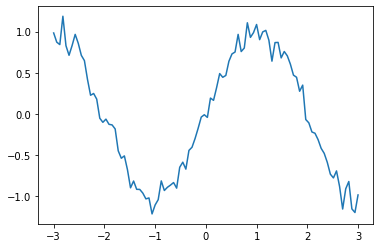

In [8]:
x = np.linspace(-3,3,100)
t = np.random.randn(x.size)*0.1
y = np.sin(np.pi*x/2) + t
y = y.reshape(-1,1)
plt.plot(x,y)
#X = np.c_[x,t]
X = x.reshape(-1,1)
N = x.size

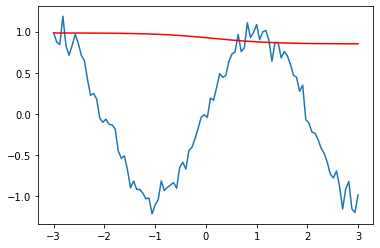

In [9]:
weights,bias = init_weights((10,1),X.shape[1])

error = []
for i in range(10000):
    ypred,a,z = feed_forward(X,weights,bias)
    error.append(np.mean((y-ypred)**2))
    dWeight, dBias = backpropagate(X,y,a,z,weights,bias)
    weigts, bias = update_weights(weights,bias,dWeight,dBias,0.5)
    
#plt.plot(error)
#plt.figure()
plt.plot(x,y)
plt.plot(x,ypred,"r")